In [1]:
import nonlinear_benchmarks as nlb
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_val, test = nlb.WienerHammerBenchMark()
print(train_val) 
# prints : Input_output_data "train WH" u.shape=(100000,) y.shape=(100000,) sampling_time=1.953e-05
print(test)
# prints: Input_output_data "test WH" u.shape=(78800,) y.shape=(78800,) sampling_time=1.953e-05 state_initialization_window_length=50
sampling_time = train_val.sampling_time #in seconds
u_train, y_train = train_val  #or train_val.u, train_val.y
u_test, y_test = test         #or test.u,      test.y
print(test.state_initialization_window_length) #the number of samples that can be used at the start of the test set to initialize the model state.

Input_output_data "train WH" u.shape=(100000,) y.shape=(100000,) sampling_time=1.953e-05
Input_output_data "test WH" u.shape=(78800,) y.shape=(78800,) sampling_time=1.953e-05 state_initialization_window_length=50
50


## EMPS

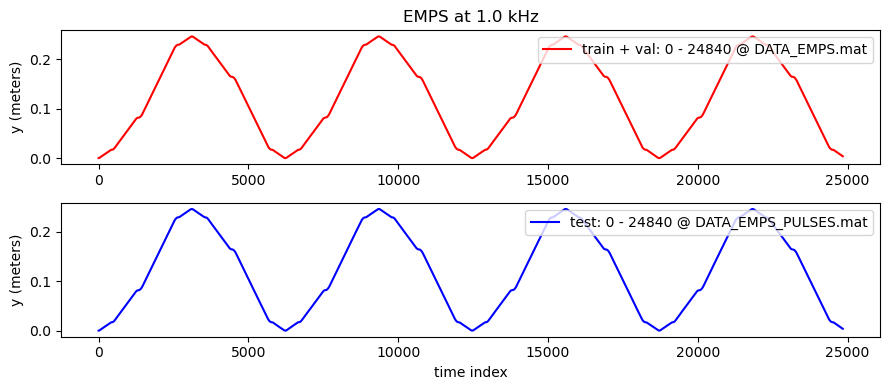

In [3]:
train_val, test = nlb.EMPS(train_test_split=True)
train_val_u, train_val_y = train_val
test_u, test_y = test

plt.figure(figsize=(9,4))
plt.subplot(2,1,1)
plt.title(f'EMPS at {1/train_val.sampling_time/1000:.1f} kHz')
plt.plot(train_val.y,'r',label=f'train + val: 0 - {len(train_val)-1} @ DATA_EMPS.mat')
plt.legend(loc='upper right')
plt.ylabel('y (meters)')
plt.subplot(2,1,2)
plt.plot(test.y,'b',label=f'test: 0 - {len(test)-1} @ DATA_EMPS_PULSES.mat')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.ylabel('y (meters)')
plt.tight_layout()
plt.savefig('../figures/EMPS.jpg',dpi=300)
plt.show()

### CED

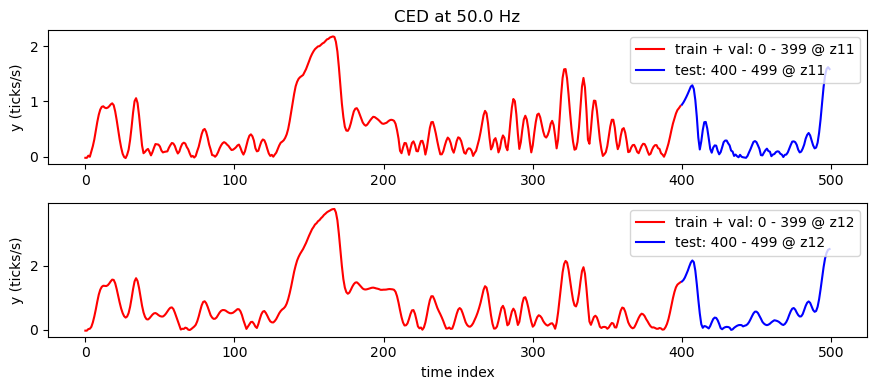

In [4]:
train_val, test = nlb.CED()
(train_val_u_1, train_val_y_1), (train_val_u_2, train_val_y_2) = train_val
(test_u_1, test_y_1), (test_u_2, test_y_2) = test

plt.figure(figsize=(9,4))
plt.subplot(2,1,1)
plt.title(f'CED at {1/train_val[0].sampling_time} Hz')
plt.plot(np.arange(400),train_val[0].y,'r',label='train + val: 0 - 399 @ z11')
plt.plot(np.arange(400,500),test[0].y,'b',label='test: 400 - 499 @ z11')
plt.ylabel('y (ticks/s)')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(np.arange(400),train_val[1].y,'r',label='train + val: 0 - 399 @ z12')
plt.plot(np.arange(400,500),test[1].y,'b',label='test: 400 - 499 @ z12')
plt.ylabel('y (ticks/s)')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/CED.jpg',dpi=300)
plt.show()

## Cascaded_Tanks

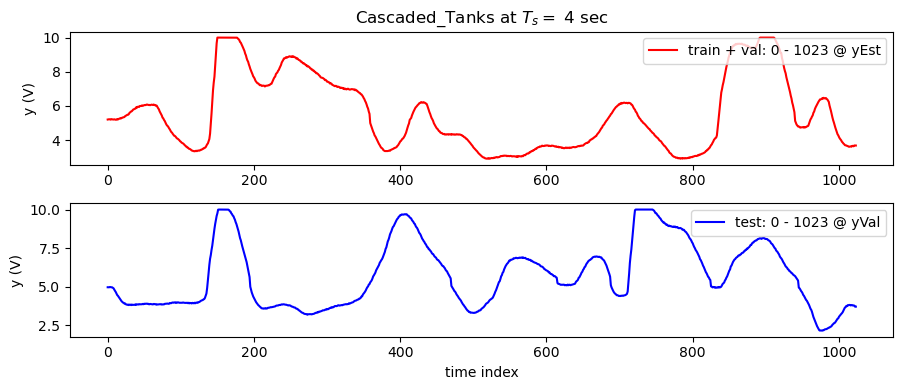

In [5]:
train_val, test = nlb.Cascaded_Tanks()
train_val_u, train_val_y = train_val
test_u, test_y = test

plt.figure(figsize=(9,4))
plt.subplot(2,1,1)
plt.title(f'Cascaded_Tanks at $T_s=$ {train_val.sampling_time} sec')
plt.plot(train_val.y,'r',label=f'train + val: 0 - {len(train_val)-1} @ yEst')
plt.ylabel('y (V)')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(test.y,'b',label=f'test: {0} - {len(test)-1} @ yVal')
plt.ylabel('y (V)')
plt.legend(loc='upper right')
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/Cascaded_Tanks.jpg',dpi=300)
plt.show()

## WienerHammerBenchMark

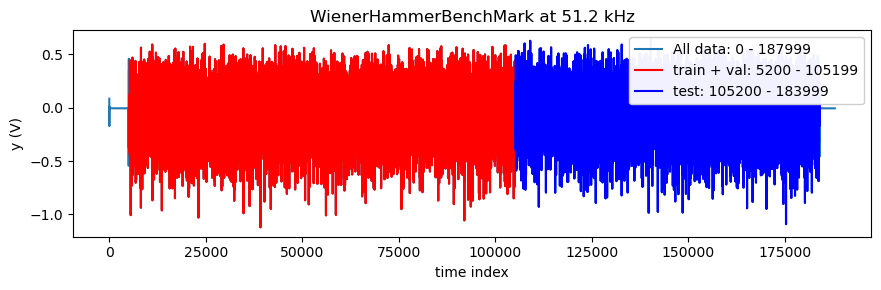

In [6]:
train_val, test = nlb.WienerHammerBenchMark()
train_val_u, train_val_y = train_val
test_u, test_y = test

full = nlb.WienerHammerBenchMark(train_test_split=False)

plt.figure(figsize=(9,3))
plt.plot(full.y,label=f'All data: 0 - {len(full)-1}')
plt.title(f'WienerHammerBenchMark at {1/train_val.sampling_time/1000:.1f} kHz')

L, R = 5200, 5200 + 100000
plt.plot(np.arange(L,R),train_val.y,'r', label=f'train + val: {L} - {R-1}')
L, R = R, R + len(test)
plt.plot(np.arange(L,R),test.y,'b', label=f'test: {L} - {R-1}')
plt.ylabel('y (V)')
plt.legend(loc='upper right',framealpha=0.95)
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/WienerHammerBenchMark.jpg',dpi=300)
plt.show()

## Silverbox

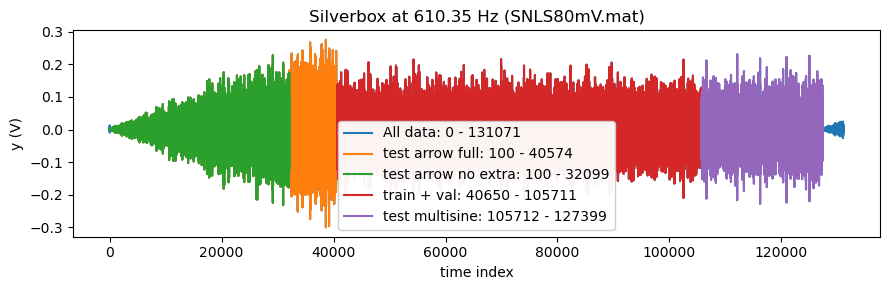

In [7]:
full = nlb.Silverbox(train_test_split=False)

train_val, test = nlb.Silverbox()
multisine_train_val = train_val
test_multisine, test_arrow_full, test_arrow_no_extrapolation = test

plt.figure(figsize=(9,3))
plt.plot(full.y,label=f'All data: 0 - {len(full)-1}')
plt.title(f'Silverbox at {1/train_val.sampling_time} Hz (SNLS80mV.mat)')

L, R = 100, 40575
plt.plot(np.arange(L,R),test_arrow_full.y, label=f'test arrow full: {L} - {R-1}')
L, R = 100, 100+32000
plt.plot(np.arange(L,R),test_arrow_no_extrapolation.y, label=f'test arrow no extra: {L} - {R-1}')
L, R = 40650, 40650 + len(multisine_train_val)
plt.plot(np.arange(L,R),multisine_train_val.y, label=f'train + val: {L} - {R-1}')
L, R = 40650 + len(multisine_train_val), 40650 + len(multisine_train_val) + len(test_multisine)
plt.plot(np.arange(L,R),test_multisine.y, label=f'test multisine: {L} - {R-1}')
plt.ylabel('y (V)')
plt.legend(loc='lower center',framealpha=0.95)
plt.xlabel('time index')
plt.tight_layout()
plt.savefig('../figures/Silverbox.jpg',dpi=300)
plt.show()


## F-16 Ground Vibration Test

https://www.nonlinearbenchmark.org/benchmarks/f-16-gvt

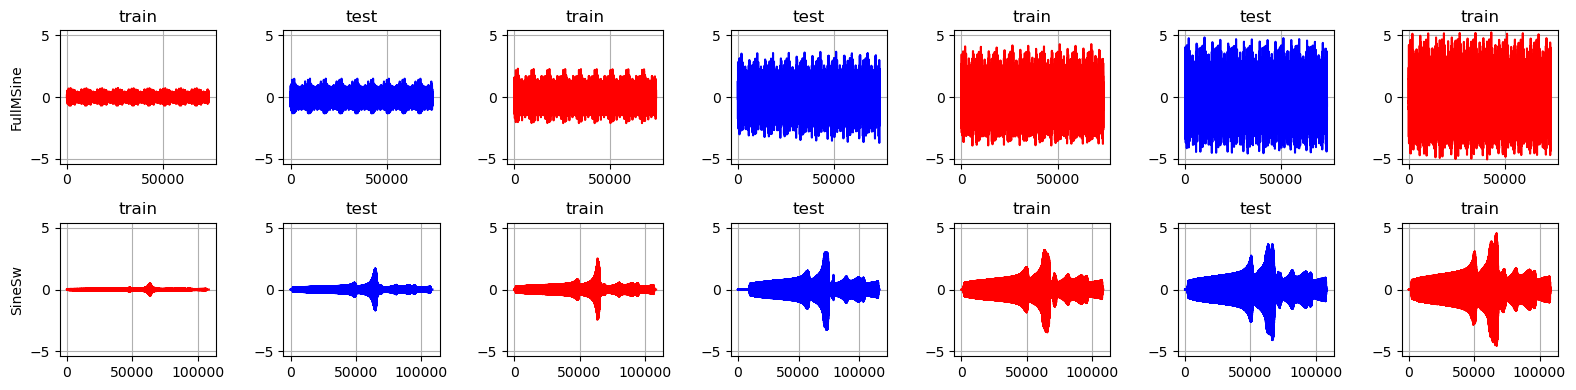

In [8]:
data = nlb.F16(train_test_split=False)
plt.figure(figsize=(16,4))
for i, d in enumerate(data, start=1):
    plt.subplot(2,7,i)
    if i==1:
        plt.ylabel('FullMSine')
    elif i==8:
        plt.ylabel('SineSw')
    plt.title('test' if 'Validation' in d.name else 'train')
    plt.plot(d.y, c='b' if 'Validation' in d.name else 'r')
    plt.ylim(-5.4, 5.4)
    plt.grid()
plt.tight_layout()
plt.savefig('../figures/F16.jpg',dpi=300)
plt.show()

## Parallel Wiener-Hammerstein System

https://www.nonlinearbenchmark.org/benchmarks/parallel-wiener-hammerstein

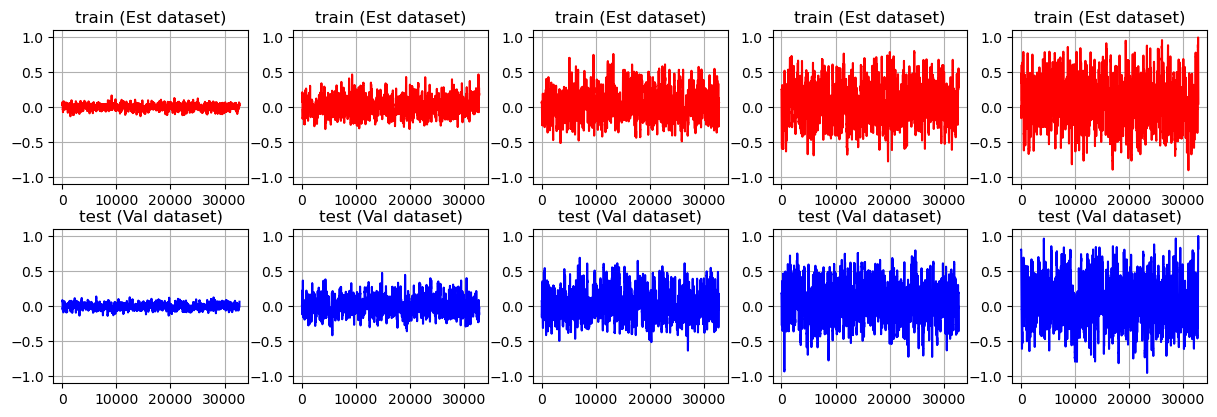

In [9]:
data = nlb.ParWH(train_test_split=False)
plt.figure(figsize=(12,4))
for i,d in enumerate(data[:5], start=1):
    plt.subplot(2,5,i)
    plt.title(f'train (Est dataset)')
    plt.plot(d.y, c='r')
    plt.ylim(-1.1, 1.1)
    plt.grid()
for i,d in enumerate(data[-5:], start=1):
    plt.subplot(2,5,i+5)
    plt.plot(d.y, c='b')
    plt.title(f'test (Val dataset)')
    plt.ylim(-1.1, 1.1)
    plt.grid()
plt.tight_layout(pad=0.1)
plt.savefig('../figures/ParWH.jpg',dpi=300)
plt.show()